In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Clustering

Até o momento exploramos uma area de aprendizagem não supervisionada: **redução de dimensionalidade** através de PCA.

Hoje olharemos outra classe de algoritmos que se enquadram neste tipo de aprendizagem: **algoritmos de clusterização**. Algoritmos de clusterização buscam aprender, a partir das variáveis observadas, uma categorização ótima dos pontos em grupos distintos.

# Conhecendo KMeans

## KMeans in 2-Dimensions

Vamos analisar um problema simples (em 2 variáveis) a partir de dados simulados.

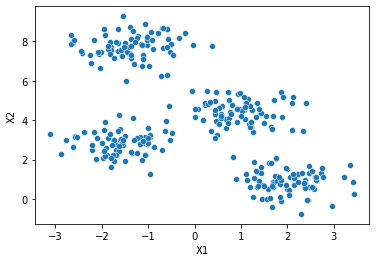

In [2]:
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs


X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=0)

tb_blob = pd.DataFrame(X)
tb_blob.columns = ['X1', 'X2']
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2');

A partir do gráfico acima podemos inferir que deveria ser possível separar os pontos, através destas duas variáveis, em 4 grupos distintos.

## O que são Centroides?

Os centroides são o centro de massa de cada grupo que vamos calcular.

No algoritmo **KMeans**, devemos especificar quantos grupos iremos buscar através do parametro **n_clusters**.

In [3]:
from sklearn.cluster import KMeans

In [4]:
clu_fit = KMeans(n_clusters = 4)

In [5]:
tb_blob.head()

,X1,X2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542


Quando utilizamos o algoritmo **KMeans** na implatanção da Scikit-Learn, os principais resultados são armazenados nos atributos **kmeans.cluster_centers_** e **kmeans.labels_**

O atributo **kmeans.labels_** guarda as previsões dos agrupamentos para o dataset que utilizamos durante a etapa de aprendizagem. Podemos utilizar o método **kmeans.predict(X)** para obter a mesma variável categórica resultante.

In [6]:
clu_fit = KMeans(n_clusters = 4)

In [7]:
clu_fit.fit(tb_blob[['X1', 'X2']])

KMeans(n_clusters=4)

In [9]:
clu_fit.labels_

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0], d

In [10]:
tb_blob['pred_cluster'] = clu_fit.predict(tb_blob[['X1', 'X2']])
# Também poderíamos usar tb_blob['pred_cluster'] = clu_fit.labels_
tb_blob['pred_cluster'] = tb_blob['pred_cluster'].astype(str)

In [11]:
tb_blob.head()

,X1,X2,pred_cluster
0,0.836857,2.136359,2
1,-1.413658,7.409623,1
2,1.155213,5.099619,3
3,-1.018616,7.814915,1
4,1.271351,1.892542,2


In [13]:
clu_fit.cluster_centers_

array([[-1.58438467,  2.83081263],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906]])

In [12]:
centroids = pd.DataFrame(clu_fit.cluster_centers_)
centroids.columns = ['X1', 'X2']
centroids.head()

,X1,X2
0,-1.584385,2.830813
1,-1.373244,7.753689
2,1.982583,0.867713
3,0.949735,4.419069


[[-1.58438467  2.83081263]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]]


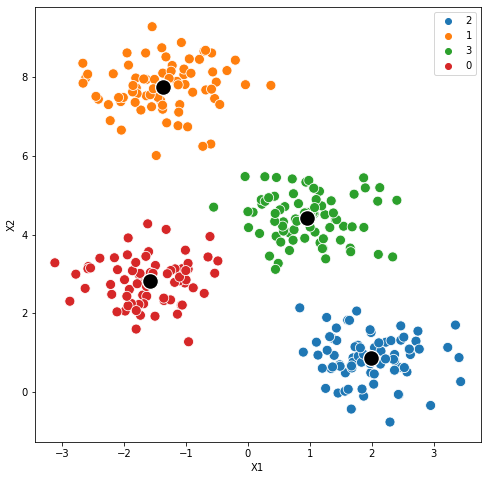

In [14]:
print(clu_fit.cluster_centers_)
plt.figure(figsize=(8,8))
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2', hue = 'pred_cluster', s = 100);
sns.scatterplot(data = centroids, x = 'X1', y = 'X2', color = 'black', s = 250);

## Os passos de KMeans

### Primeira Iteração - Inicialização dos Centróides

Começamos inicializando um vetor de centroides aleatórios.

In [15]:
p1 = (np.quantile(tb_blob["X1"], 0.25), np.quantile(tb_blob["X2"], 0.25))
p2 = (np.quantile(tb_blob["X1"], 0.25), np.quantile(tb_blob["X2"], 0.75))
p3 = (np.quantile(tb_blob["X1"], 0.75), np.quantile(tb_blob["X2"], 0.25))
p4 = (np.quantile(tb_blob["X1"], 0.75), np.quantile(tb_blob["X2"], 0.75))

tb_centroids = pd.DataFrame(
    [p1, p2, p3, p4], columns=["X1", "X2"], index=["p1", "p2", "p3", "p4"]
)
tb_centroids

,X1,X2
p1,-1.498837,1.916025
p2,-1.498837,5.607633
p3,1.433350,1.916025
p4,1.433350,5.607633


<AxesSubplot:xlabel='X1', ylabel='X2'>

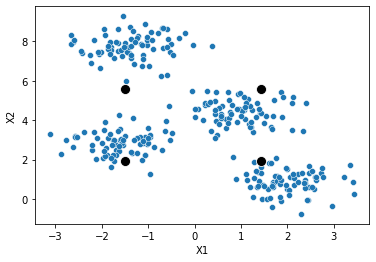

In [16]:
sns.scatterplot(data=tb_blob, x="X1", y="X2")
sns.scatterplot(data=tb_centroids, x="X1", y="X2", color="black", s=100)

### Primeira Iteração - Calculando Membros de Clusters
Agora, vamos atualizar a posição dos nossos centróides:

In [17]:
for centroid in tb_centroids.iterrows():
    centroid_name = centroid[0]
    centroid_x1 = centroid[1]["X1"]
    centroid_x2 = centroid[1]["X2"]
    tb_blob[centroid_name] = (tb_blob["X1"] - centroid_x1) ** 2 + (tb_blob["X2"] - centroid_x2) ** 2

tb_blob.head()

,X1,X2,pred_cluster,p1,p2,p3,p4
0,0.836857,2.136359,2,5.504011,17.505205,0.404351,12.405544
1,-1.413658,7.409623,1,30.186872,3.254424,38.285072,11.352624
2,1.155213,5.099619,3,17.179247,7.302058,10.212627,0.335439
3,-1.018616,7.814915,1,35.027506,5.102704,40.809033,10.884231
4,1.271351,1.892542,2,7.674494,21.475843,0.026795,13.828144


In [18]:
tb_blob["cluster"] = tb_blob[["p1", "p2", "p3", "p4"]].idxmin(1)
tb_blob.head()

,X1,X2,pred_cluster,p1,p2,p3,p4,cluster
0,0.836857,2.136359,2,5.504011,17.505205,0.404351,12.405544,p3
1,-1.413658,7.409623,1,30.186872,3.254424,38.285072,11.352624,p2
2,1.155213,5.099619,3,17.179247,7.302058,10.212627,0.335439,p4
3,-1.018616,7.814915,1,35.027506,5.102704,40.809033,10.884231,p2
4,1.271351,1.892542,2,7.674494,21.475843,0.026795,13.828144,p3


<AxesSubplot:xlabel='X1', ylabel='X2'>

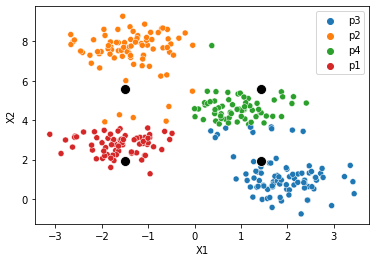

In [19]:
sns.scatterplot(data=tb_blob, x="X1", y="X2", hue="cluster")
sns.scatterplot(data=tb_centroids, x="X1", y="X2", color="black", s=100)

### Primeira Atualização - Recalculando Centróides

Agora, vamos utilizar os pontos de cada cluster estimados na etapa anterior para atualizar a posição de meus centróides:

In [20]:
tb_centroids = tb_blob.groupby("cluster")[["X1", "X2"]].mean()
tb_centroids

,X1,X2
cluster,,
p1,-1.596219,2.761201
p2,-1.368288,7.502143
p3,1.884543,1.201490
p4,0.933740,4.615895


<AxesSubplot:xlabel='X1', ylabel='X2'>

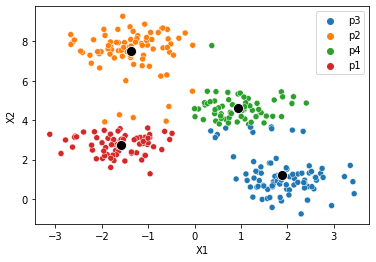

In [21]:
sns.scatterplot(data=tb_blob, x="X1", y="X2", hue="cluster")
sns.scatterplot(data=tb_centroids, x="X1", y="X2", color="black", s=100)

### Segunda Iteração - Calculando Membros de Clusters

A segunda iteração (e todas as subsequentes) repetem as duas últimas etapas da primeira iteração: primeiro atualizamos os membros de nossos clusters de acordo com os centróides calculados na última etapa...

In [22]:
for centroid in tb_centroids.iterrows():
    centroid_name = centroid[0]
    centroid_x1 = centroid[1]["X1"]
    centroid_x2 = centroid[1]["X2"]
    tb_blob[centroid_name] = (tb_blob["X1"] - centroid_x1) ** 2 + (
        tb_blob["X2"] - centroid_x2
    ) ** 2
tb_blob["cluster"] = tb_blob[["p1", "p2", "p3", "p4"]].idxmin(1)
tb_blob.head()

,X1,X2,pred_cluster,p1,p2,p3,p4,cluster
0,0.836857,2.136359,2,6.310286,33.654299,1.971627,6.157485,p3
1,-1.413658,7.409623,1,21.641157,0.010618,49.419049,13.315194,p2
2,1.155213,5.099619,3,13.038577,12.140181,15.727330,0.283039,p4
3,-1.018616,7.814915,1,25.873646,0.220097,52.165719,14.045420,p2
4,1.271351,1.892542,2,8.977530,38.435320,0.853557,7.530634,p3


<AxesSubplot:xlabel='X1', ylabel='X2'>

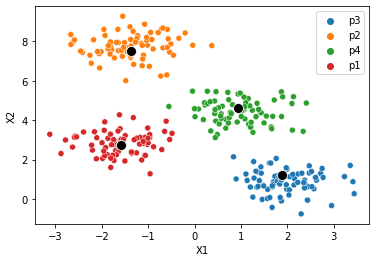

In [23]:
sns.scatterplot(data=tb_blob, x="X1", y="X2", hue="cluster")
sns.scatterplot(data=tb_centroids, x="X1", y="X2", color="black", s=100)

### Segunda Atualização - Recalculando Centróides

...depois recalculamos os centróides a partir dos membros de cada cluster.

<AxesSubplot:xlabel='X1', ylabel='X2'>

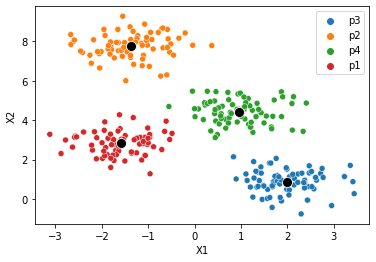

In [24]:
tb_centroids = tb_blob.groupby("cluster")[["X1", "X2"]].mean()
sns.scatterplot(data=tb_blob, x="X1", y="X2", hue="cluster")
sns.scatterplot(data=tb_centroids, x="X1", y="X2", color="black", s=100)

## Problemas do KMeans

Apesar de sua simplicidade e efetividade, o algoritmo k-Means apresenta um grande problema: como determinamos **k**? Se nossos espaço de features tem 2 dimensões, podemos fazer um gráfico, como fizemos até agora. A maior parte dos problemas reais apresenta mais dimensões: nesses casos utilizaremos algumas ferramentas para auxiliar nessa determinação.

Começaremos vendo as medidas de inérica e silhueta - que podemos utilizar para 'otimizar' o número de clusters.

### Selecionando K

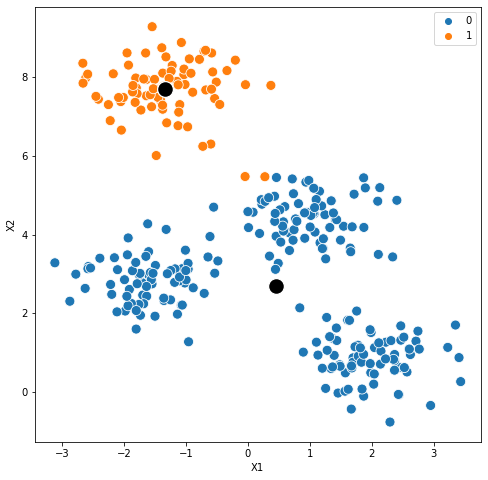

In [25]:
clu_fit = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10)
clu_fit.fit(tb_blob[['X1', 'X2']])
tb_blob['pred_cluster'] = clu_fit.predict(tb_blob[['X1', 'X2']])
tb_blob['pred_cluster'] = tb_blob['pred_cluster'].astype(str)

centroids = pd.DataFrame(clu_fit.cluster_centers_)
centroids.columns = ['X1', 'X2']
plt.figure(figsize=(8,8))
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2', hue = 'pred_cluster', s = 100);
sns.scatterplot(data = centroids, x = 'X1', y = 'X2', color = 'black', s = 250);

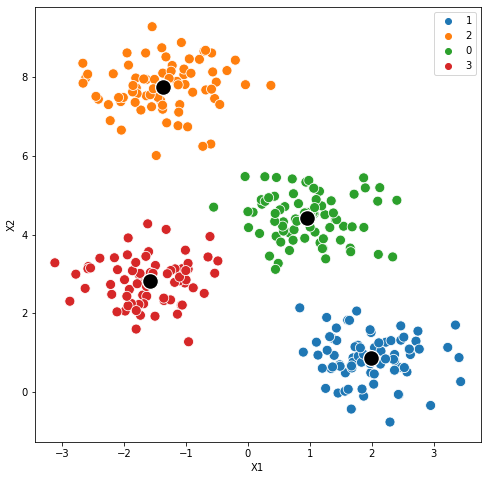

In [27]:
clu_fit = KMeans(n_clusters = 4)
clu_fit.fit(tb_blob[['X1', 'X2']])
tb_blob['pred_cluster'] = clu_fit.predict(tb_blob[['X1', 'X2']])
tb_blob['pred_cluster'] = tb_blob['pred_cluster'].astype(str)
centroids = pd.DataFrame(clu_fit.cluster_centers_)
centroids.columns = ['X1', 'X2']
plt.figure(figsize=(8,8))
sns.scatterplot(data = tb_blob, x = 'X1', y = 'X2', hue = 'pred_cluster', s = 100);
sns.scatterplot(data = centroids, x = 'X1', y = 'X2', color = 'black', s = 250);

#### Inércia

A inércia é uma medida da coesão interna de um cluster: ela mede o quão parecido os pontos de um dado grupo são entre si e é uma medida de distorção (quanto maior, piores os clusters). Ela é medida como a soma do quadrado da distância de cada ponto ao centroide de seu cluster.

https://towardsdatascience.com/clustering-how-to-find-hyperparameters-using-inertia-b0343c6fe819

In [28]:
inertia_list = []

for i in range(2, 11):
    clu_fit = KMeans(n_clusters = i)
    clu_fit.fit(tb_blob[['X1', 'X2']])
    inertia_list.append(clu_fit.inertia_)
    
tb_inertia = pd.DataFrame({'k' : list(range(2, 11)), 'inertia' : inertia_list})
tb_inertia.head(10)

,k,inertia
0,2,1190.782359
1,3,546.891150
2,4,212.005996
3,5,194.467869
4,6,170.169144
5,7,153.455297
6,8,137.631901
7,9,123.526852
8,10,112.233968


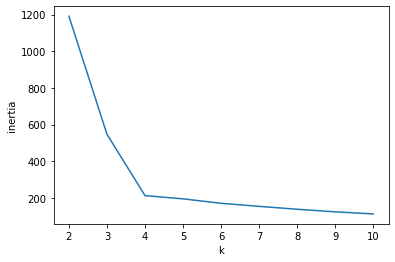

In [29]:
sns.lineplot(data = tb_inertia, x = 'k', y = 'inertia');

In [30]:
from yellowbrick.cluster import KElbowVisualizer

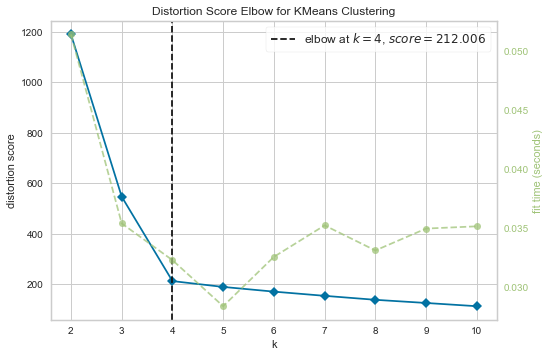

In [32]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(tb_blob[['X1', 'X2']])
visualizer.show();

#### Silhueta

Embora a inércia seja uma ótima medida de quanto cada ponto pertence ao seu cluster ela não leva em conta o quão parecido cada ponto é com os outros clusters. A silhueta é uma medida associada à cada ponto do nosso conjunto de dados que mede a relação entre *o quão parecido cada ponto é com seu proprio cluster* e o *quão parecido cada ponto é com o cluster mais próximo ao qual ele não pertence*. Ela é definida como a diferença entre a distância média de um ponto para cada elemento de seu cluter e a distância de um ponto para cada elemento do cluster mais próximo (que não aquele ao qual ele pertence) normalizada pelo máximo entre essas duas distâncias.

Como ela é medida por ponto, podemos utiliza-la para avaliar quão bem *enquadrado* cada um está em seu cluster - os pontos com silhueta = 1 são os melhores enquadrados, os com silhueta = -1 os piores.

https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891

In [33]:
clu_fit = KMeans(n_clusters = 2)
clu_fit.fit(tb_blob[['X1', 'X2']])

KMeans(n_clusters=2)

In [34]:
tb_blob['pc_k2'] = clu_fit.predict(tb_blob[['X1', 'X2']])
tb_blob['pc_k2'] = tb_blob['pc_k2'].astype(str)
tb_blob.head()

,X1,X2,pred_cluster,p1,p2,p3,p4,cluster,pc_k2
0,0.836857,2.136359,1,6.310286,33.654299,1.971627,6.157485,p3,0
1,-1.413658,7.409623,2,21.641157,0.010618,49.419049,13.315194,p2,1
2,1.155213,5.099619,0,13.038577,12.140181,15.727330,0.283039,p4,0
3,-1.018616,7.814915,2,25.873646,0.220097,52.165719,14.045420,p2,1
4,1.271351,1.892542,1,8.977530,38.435320,0.853557,7.530634,p3,0


In [35]:
clu_fit = KMeans(n_clusters = 10)
clu_fit.fit(tb_blob[['X1', 'X2']])

tb_blob['pc_k10'] = clu_fit.predict(tb_blob[['X1', 'X2']])
tb_blob['pc_k10'] = tb_blob['pc_k10'].astype(str)

In [36]:
tb_blob.head()

,X1,X2,pred_cluster,p1,p2,p3,p4,cluster,pc_k2,pc_k10
0,0.836857,2.136359,1,6.310286,33.654299,1.971627,6.157485,p3,0,3
1,-1.413658,7.409623,2,21.641157,0.010618,49.419049,13.315194,p2,1,1
2,1.155213,5.099619,0,13.038577,12.140181,15.727330,0.283039,p4,0,6
3,-1.018616,7.814915,2,25.873646,0.220097,52.165719,14.045420,p2,1,8
4,1.271351,1.892542,1,8.977530,38.435320,0.853557,7.530634,p3,0,3


In [37]:
from sklearn.metrics import silhouette_samples

In [38]:
tb_blob['sil_k2'] = silhouette_samples(tb_blob[['X1', 'X2']], tb_blob['pc_k2'])
tb_blob['sil_k10'] = silhouette_samples(tb_blob[['X1', 'X2']], tb_blob['pc_k10'])

In [39]:
tb_blob.head()

,X1,X2,pred_cluster,p1,p2,p3,p4,cluster,pc_k2,pc_k10,sil_k2,sil_k10
0,0.836857,2.136359,1,6.310286,33.654299,1.971627,6.157485,p3,0,3,0.625439,0.137378
1,-1.413658,7.409623,2,21.641157,0.010618,49.419049,13.315194,p2,1,1,0.830734,0.356166
2,1.155213,5.099619,0,13.038577,12.140181,15.727330,0.283039,p4,0,6,0.175978,0.280554
3,-1.018616,7.814915,2,25.873646,0.220097,52.165719,14.045420,p2,1,8,0.835520,0.329765
4,1.271351,1.892542,1,8.977530,38.435320,0.853557,7.530634,p3,0,3,0.632370,0.339853


<AxesSubplot:xlabel='X1', ylabel='X2'>

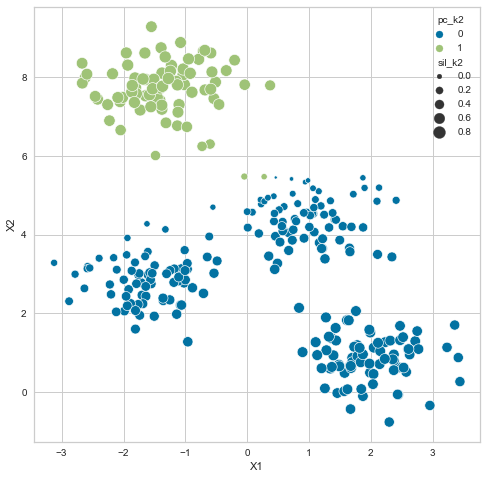

In [40]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=tb_blob,
                x='X1',
                y='X2',
                hue='pc_k2',
                size='sil_k2',
                sizes=(10, 150))

<AxesSubplot:xlabel='X1', ylabel='X2'>

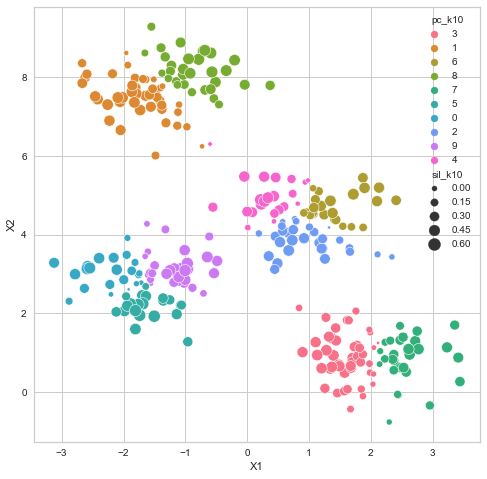

In [41]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=tb_blob,
                x='X1',
                y='X2',
                hue='pc_k10',
                size='sil_k10',
                sizes=(10, 150))

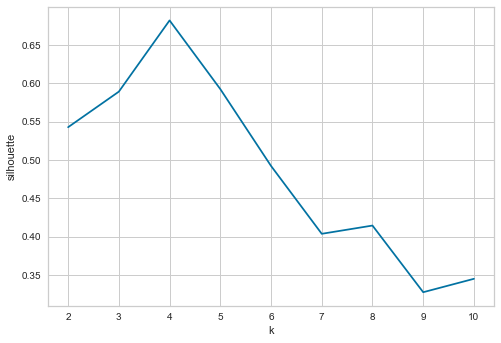

In [42]:
from sklearn.metrics import silhouette_score
sil_list = []

for i in range(2, 11):
    clu_fit = KMeans(n_clusters = i)
    clu_fit.fit(tb_blob[['X1', 'X2']])
    sil = silhouette_score(tb_blob[['X1', 'X2']], clu_fit.labels_)
    sil_list.append(sil)
    
tb_inertia = pd.DataFrame({'k' : list(range(2, 11)), 'silhouette' : sil_list})
sns.lineplot(data = tb_inertia, x = 'k', y = 'silhouette');

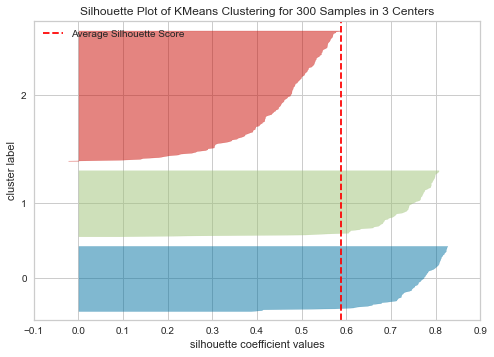

In [46]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(tb_blob[['X1', 'X2']])
visualizer.show();

# Um exemplo prático

In [47]:
tb_usarrests = pd.read_csv('data/USArrests.csv', index_col=0)
tb_usarrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


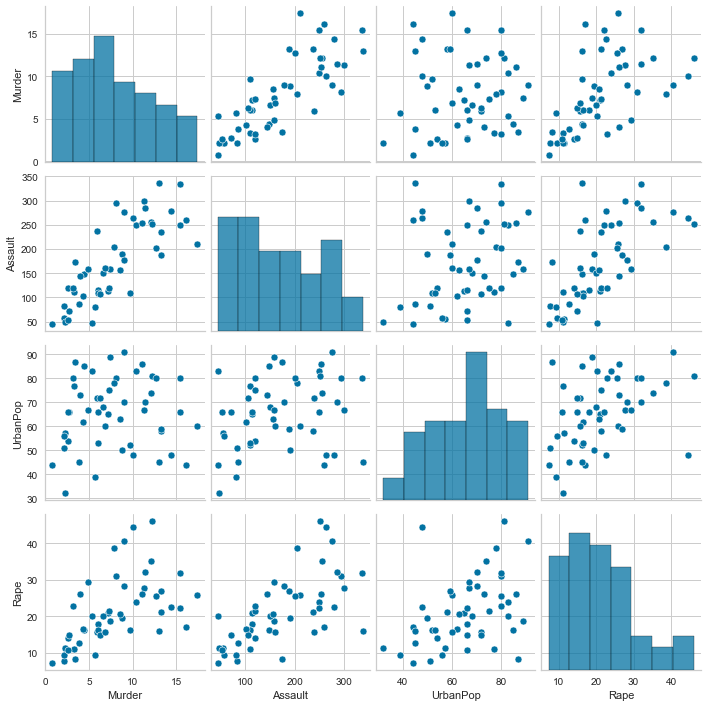

In [48]:
sns.pairplot(data = tb_usarrests)

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Padronizar os dados

In [50]:
scaler = StandardScaler()
scaler.fit(tb_usarrests)

tb_std_usa = pd.DataFrame(scaler.transform(tb_usarrests), 
                          columns = tb_usarrests.columns)

In [51]:
tb_std_usa.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


## Como visualizar relações em mais do que 2 dimensões?

In [52]:
pca_fit = PCA()

pca_fit.fit(tb_std_usa)
print(np.cumsum(pca_fit.explained_variance_ratio_))

[0.62006039 0.86750168 0.95664248 1.        ]


In [53]:
tb_pca_usa = pd.DataFrame(pca_fit.transform(tb_std_usa),
                          columns = ['PC1', 'PC2', 'PC3', 'PC4'])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

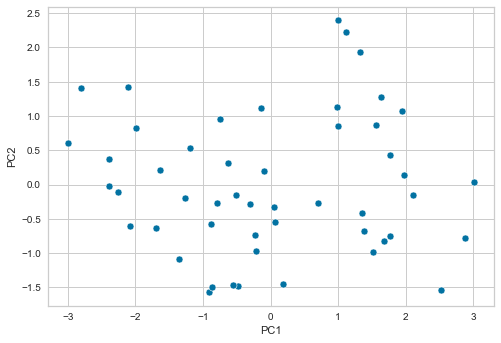

In [54]:
sns.scatterplot(data = tb_pca_usa, x = 'PC1', y = 'PC2')

## Escolhendo K

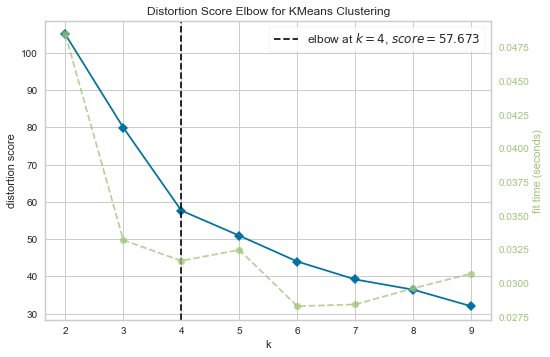

In [55]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(tb_pca_usa)
visualizer.show();

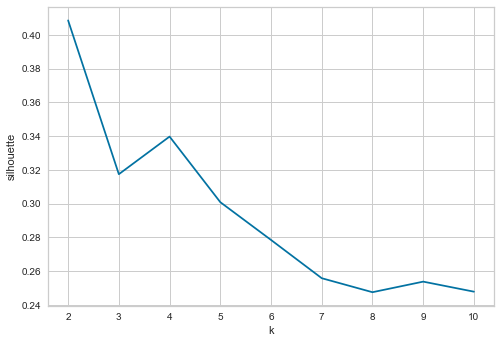

In [56]:
sil_list = []

for i in range(2, 11):
    clu_fit = KMeans(n_clusters = i)
    clu_fit.fit(tb_pca_usa)
    sil = silhouette_score(tb_pca_usa, clu_fit.labels_)
    sil_list.append(sil)
    
tb_inertia = pd.DataFrame({'k' : list(range(2, 11)), 'silhouette' : sil_list})
sns.lineplot(data = tb_inertia, x = 'k', y = 'silhouette');

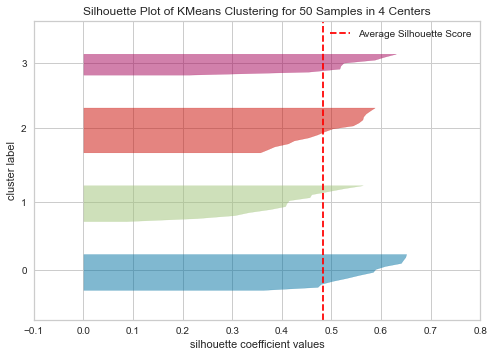

In [81]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(tb_pca_usa)
visualizer.show();

## Analisando os resultados finais

In [77]:
clu_fit_final = KMeans(4)
clu_fit_final.fit(tb_pca_usa)

KMeans(n_clusters=4)

In [78]:
tb_pca_usa['cluster'] = clu_fit_final.labels_
tb_pca_usa['cluster'] = tb_pca_usa['cluster'].astype(str)

tb_usarrests['cluster'] = clu_fit_final.labels_
tb_usarrests['cluster'] = tb_usarrests['cluster'].astype(str)

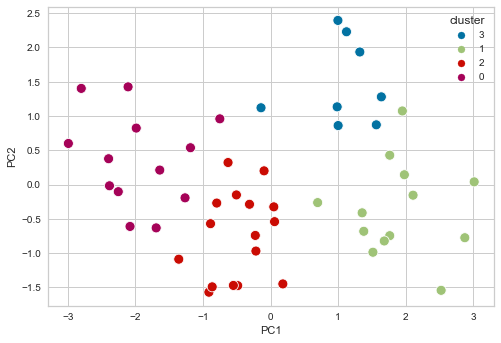

In [79]:
sns.scatterplot(data = tb_pca_usa, x = 'PC1', y = 'PC2', hue = 'cluster', s = 100);

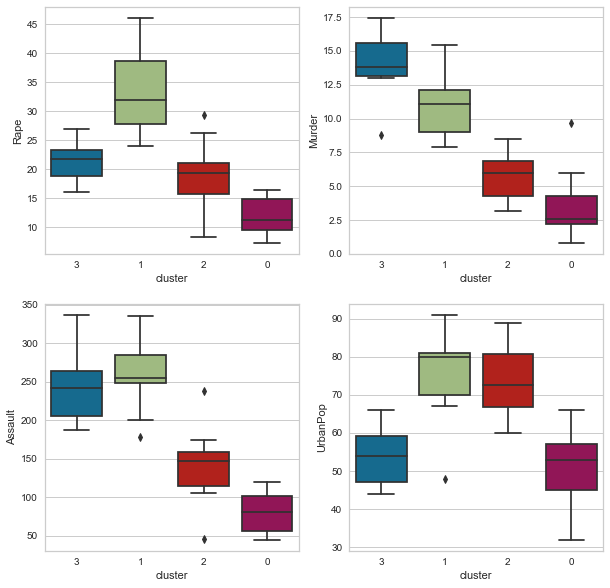

In [80]:
fig, ax = plt.subplots(2,2,figsize=(10, 10))
sns.boxplot(data = tb_usarrests, x = 'cluster', y = 'Rape', ax = ax[0][0]);
sns.boxplot(data = tb_usarrests, x = 'cluster', y = 'Murder', ax = ax[0][1]);
sns.boxplot(data = tb_usarrests, x = 'cluster', y = 'Assault', ax = ax[1][0]);
sns.boxplot(data = tb_usarrests, x = 'cluster', y = 'UrbanPop', ax = ax[1][1]);

In [85]:
tb_usarrests[tb_usarrests['cluster'] == '3']

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Arkansas,8.8,190,50,19.5,3
Georgia,17.4,211,60,25.8,3
Louisiana,15.4,249,66,22.2,3
Mississippi,16.1,259,44,17.1,3
North Carolina,13.0,337,45,16.1,3
South Carolina,14.4,279,48,22.5,3
Tennessee,13.2,188,59,26.9,3


# VOLTAMOS AS 21H15